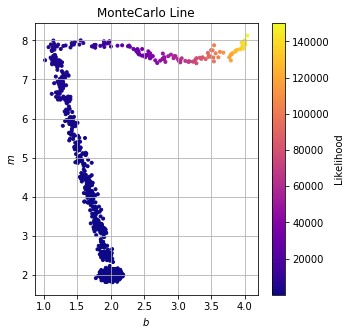

In [170]:
#model -> lambda
#theta -> theta
#sigma -> sigma
#data -> x
#theory -> y
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

NMAX = 10000


def lnL(model, data, sigma, theory, theta):
    return -0.5 * np.sum(((theory - model(data, theta)))**2)
    
def monteCarlo(model, data, sigma, theory, p0):
    
    chain = []
    L0 = lnL(model, data, sigma, theory, p0)
    chain.append([p0, L0])
                   
    for i in range(0, NMAX):
        newp = []
        
        for index, value in enumerate(p0):
            newp.append(sigma[index] * np.random.randn() + value)
            
        newL = lnL(model, data, sigma, theory, newp)
        
        if(newL > L0):
            chain.append([newp, newL])
            p0 = newp
            L0 = newL
            continue
        
        elif(newL/L0 > np.random.randn()):
            chain.append([newp, newL])
            
    else: return chain
            
def line(x, theta):
    return theta[0]*x + theta[1]

theory = [2, 3]
x = np.linspace(0, 10, 1000)
y = theory[0]*x + theory[0]
sigma = [0.05, 0.05]
p0 = [4, 8]

fit = monteCarlo(line, x, sigma, y, p0)

xy = [x for x, y in fit]
Ls = [y for x, y in fit]

x = [x for x, y in xy]
y = [y for x, y in xy]

fig, ax0 = plt.subplots(figsize=(5, 5))

cadena = ax0.scatter(x, y, c = np.abs(Ls),  cmap = 'plasma', marker = '.')
ax0.plot()

ax0.set_ylabel('$m$')
ax0.set_xlabel('$b$')
ax0.set_title('MonteCarlo Line') 

fig.colorbar(cadena, label='Likelihood')

ax0.grid()

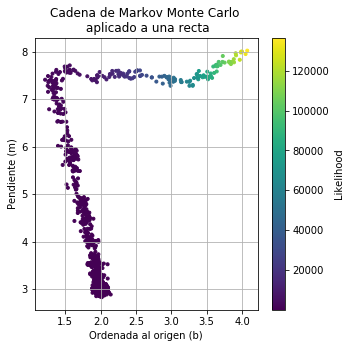

In [171]:
def montecarlo_mc(datos, teoria, modelo, desviaciones, p_old, n_pasos=5000, step_size=1):
    '''
    REQUIREMENTS: Numpy
    DESCRIPTION: Esta funcion aplica el metodo de montecarlo para obtener los valores
                 mas probables de determinados parametros de un modelo aplicado a
                 ciertos datos conocidos.
    IN: datos = las x, variable independiente,
        teoria = las y, variable dependiente,
        modelo = funcion que aplica el modelo,
        desviaciones = desviaciones estandar conocidas para cada parametro,
        p_old = aproximación inicial,
        n_pasos = numero de pasos,
        step_size = tamaño maximo de avance en todos los parametros
    OUT: cadena de markov con likelihoods asociados
    '''
    
    markov_chain = []
    L_old = likelihood(datos, p_old, teoria, modelo, desviaciones)
    markov_chain.append([p_old, L_old])
    
    for paso in range(n_pasos):
        
        p_new = []
        for j, parametro in enumerate(p_old):
            p_new.append(desviaciones[j]*np.random.randn()*step_size+parametro)
        
        L_new = likelihood(datos, p_new, teoria, modelo, desviaciones)
        
        if (L_new>L_old):
            markov_chain.append([p_new, L_new])
            p_old = p_new
            L_old = L_new
            continue
        elif  (L_new/L_old > np.random.randn()):
            markov_chain.append([p_new, L_new])
        
    else:     
        return markov_chain
            
def likelihood(datos, parametros, teoria, modelo, desviaciones):
    return -(1/2)*np.sum((teoria-modelo(datos,parametros))**2)

# Definimos el modelo que aplicamos, que es una recta
def recta(x, parametros):
    return x*parametros[0]+parametros[1]

#Construimos la recta:
x = np.linspace(0, 10, 1000)
#1.25, 3
p_reales = [2, 3]
des = [0.05, 0.05]
y = x*p_reales[0]+p_reales[1]

#Aplicamos el mcmc
ajuste = montecarlo_mc(datos = x, teoria = y, modelo = recta, desviaciones = des,
                       p_old = [4, 8], n_pasos = 1000, step_size = 1)

puntos = [x for x,y in ajuste]
like = [y for x, y in ajuste]

x = [x for x, y in puntos]
y = [y for x, y in puntos]

fig, ax0 = plt.subplots(figsize=(5, 5))

cadena = ax0.scatter(x, y, c = np.abs(like),  cmap = 'viridis', marker = '.')
ax0.plot()

ax0.set_ylabel('Pendiente (m)')
ax0.set_xlabel('Ordenada al origen (b)')
ax0.set_title('Cadena de Markov Monte Carlo \n aplicado a una recta') 

fig.colorbar(cadena, label='Likelihood')

ax0.grid()

In [200]:
print(f'La aproximación final es, para la pendiente m = {ajuste[-1][0][0]:.4f}\n' + \
        f'Para la ordenada al origen b = {ajuste[-1][0][1]:.4f}\n' +\
        f'Los datos reales eran b={p_reales[1]}, m = {p_reales[0]}')
x[1], y[1]

La aproximación final es, para la pendiente m = 1.9448
Para la ordenada al origen b = 3.0906
Los datos reales eran b=3, m = 2


(0.01001001001001001, 1.01001001001001)

In [104]:
np.random.uniform()

0.9169103686608496

In [118]:
list(range(0,1))

[0]

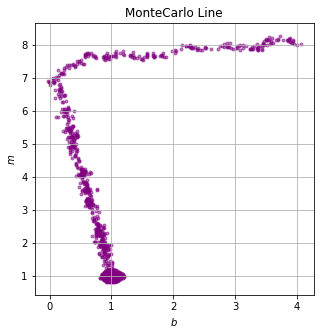

In [180]:
#model -> lambda
#theta -> theta
#sigma -> sigma
#data -> x
#theory -> y
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

NMAX = 10000
theory = [1, 1]
x = np.linspace(0, 10, 1000)
y = theory[0]*x + theory[0]
sigma = [0.05, 0.05]
p0 = [4, 8]

def lnL(model, data, sigma, theory, theta):
    return -0.5 * np.sum(((theory - model(data, theta)))**2)
    
def monteCarlo(model, data, sigma, theory, p0):
    
    chain = []
    L0 = lnL(model, data, sigma, theory, p0)
    chain.append([p0, L0])
                   
    for i in range(0, NMAX):
        newp = []
        
        for index, value in enumerate(p0):
            newp.append(sigma[index] * np.random.randn() + value)
            
        newL = lnL(model, data, sigma, theory, newp)
        
        if(newL > L0):
            chain.append([newp, newL])
            p0 = newp
            L0 = newL
            continue
        
        elif(newL/L0 > np.random.randn()):
            chain.append([newp, newL])
            
    else: return chain
            
def line(x, theta):
    return theta[0]*x + theta[1]

fit = monteCarlo(line, x, sigma, y, p0)

xy = [x for x, y in fit]
Ls = [y for x, y in fit]

x = [x for x, y in xy]
y = [y for x, y in xy]

fig, ax0 = plt.subplots(figsize=(5, 5))

cadena = ax0.scatter(x, y, color = 'purple', alpha = 0.5, marker = '.')
ax0.plot()

ax0.set_ylabel('$m$')
ax0.set_xlabel('$b$')
ax0.set_title('MonteCarlo Lineal') 
ax0.grid()

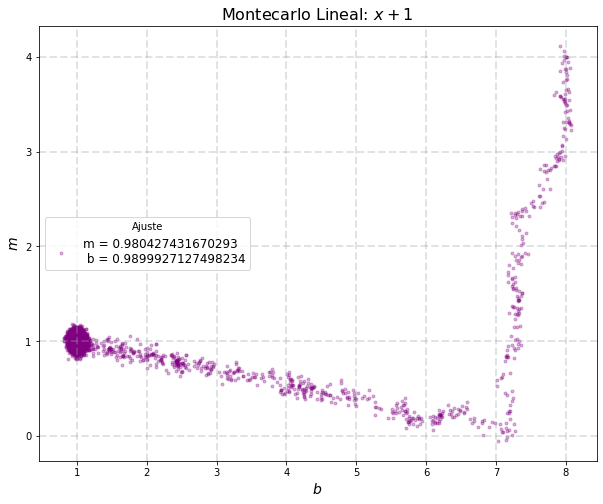

In [231]:
#model -> lambda
#theta -> theta
#sigma -> sigma
#data -> x
#theory -> y
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

NMAX = 10000
theory = [1, 1]
x = np.linspace(0, 10, 1000)
y = theory[0]*x + theory[0]
sigma = [0.05, 0.05]
p0 = [4, 8]

def lnL(model, data, sigma, theory, theta):
    return -0.5 * np.sum(((theory - model(data, theta)))**2)
    
def monteCarlo(model, data, sigma, theory, p0):
    chain = []
    L0 = lnL(model, data, sigma, theory, p0)
    chain.append([p0, L0])
                   
    for i in range(0, NMAX):
        newp = []
        for index, value in enumerate(p0): newp.append(sigma[index] * np.random.randn() + value)
        newL = lnL(model, data, sigma, theory, newp)
        
        if(newL > L0):
            chain.append([newp, newL])
            p0 = newp
            L0 = newL
            continue        
        elif(newL/L0 > np.random.randn()): chain.append([newp, newL])
            
    else: return chain
            
def line(x, theta):
    return theta[0]*x + theta[1]

fit = monteCarlo(line, x, sigma, y, p0)

dots, likelihoods = [], []
xdots, ydots = [], []

for i in range(0, len(fit)):
    dots.append(fit[i][0])
    likelihoods.append(fit[i][1])

for i in range(0, len(dots)):
    xdots.append(dots[i][0])
    ydots.append(dots[i][1])

fig, ax0 = plt.subplots(figsize=(10, 8))

plt.scatter(ydots, xdots, color = 'purple', alpha = 0.3, marker = '.',  label = 'm = ' + str(xdots[-1]) + '\n b = ' + str(ydots[-1]))
plt.xlabel('$b$', fontsize = 14)
plt.ylabel('$m$', fontsize = 14)
plt.title('Montecarlo Lineal: $x + 1$', fontsize = 16)
plt.legend(title = 'Ajuste', loc = 'center left', fontsize = 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

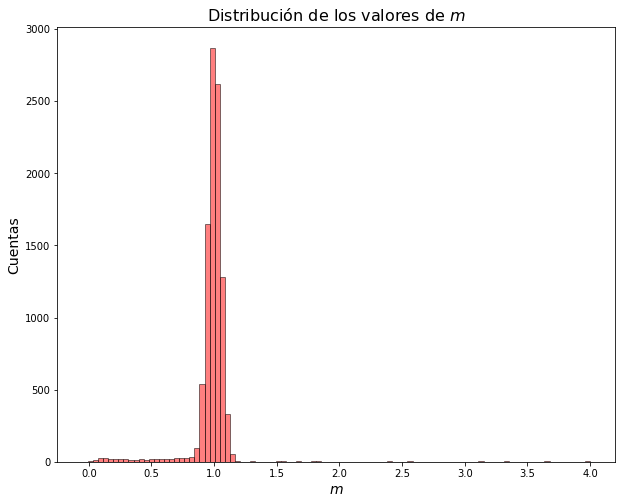

In [226]:
fig, ax0 = plt.subplots(figsize=(10, 8))
plt.hist(xdots, ec = 'black', color = 'red', alpha = 0.5, bins = 100)
plt.title('Distribución de los valores de $m$', fontsize = 16)
plt.xlabel('$m$', fontsize = 14)
plt.ylabel('Cuentas', fontsize = 14)
plt.show()

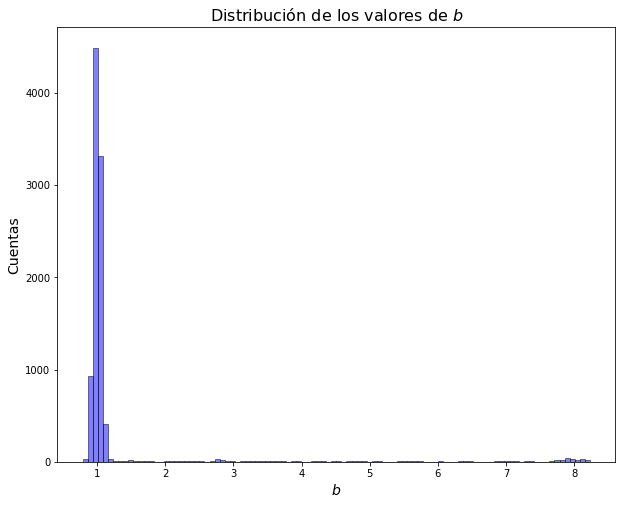

In [230]:
fig, ax0 = plt.subplots(figsize=(10, 8))
plt.hist(ydots, ec = 'black', color = 'blue', alpha = 0.5, bins = 100)
plt.title('Distribución de los valores de $b$', fontsize = 16)
plt.xlabel('$b$', fontsize = 14)
plt.ylabel('Cuentas', fontsize = 14)
plt.show()